# Chapter 02: End to End ML Project

### Topics:
- Working with Real Data
- Look at the Big Picture:
    - Frame the Problem
    - Select a Performance Measure
    - Check the Assumptions
- Get the Data
    - Create the Workspace
    - Download the Data
    - Take a Quick Look at the Data Structure
    - Create a Test Set
- Discover and Visualize Data to get Insights
    - Visualizing Geographical Data
    - Looking for Correlations
    - Experimenting with Attribute Combinations
- Prepare the Data for Machine Learning Algorithms
    - Data Cleaning
    - Handling Text and Categorical Attributes
    - Custom Transformers
    - Feature Scaling
- Select and Train a Model
    - Training and Evaluating on the Training Set
    - Better Evaluation using Cross Validation
- Fine-Tune your Model
    - Grid Search
    - Randomized Search
    - Ensamble Methods
    - Analyze the Best Models and their Errors
    - Evaluate your System on the Test Set
- Launch, Monitor, and Maintain your System
- Try it out!

In [27]:
# Loading libraries
import os
import pandas as pd
import numpy as np

HOUSING_PATH = "./datasets/housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Another way
data2 = pd.read_csv("./datasets/housing/housing.csv")

In [28]:
# Equivalent of R's getwd()
print("Current Working Dir: {}".format(os.getcwd()))
#
os.listdir()

Current Working Dir: C:\Users\rafael\Dropbox\Python Programming\handson-ml-master\Labs


['.ipynb_checkpoints',
 'C01_MLIntro.ipynb',
 'C02L02.py',
 'C02_E2EMLProject.ipynb',
 'C03_Classification.ipynb',
 'C04_TrainingModels.ipynb',
 'C05_SVM.ipynb',
 'C06_DecTrees.ipynb',
 'datasets',
 'images',
 'my_model.pkl',
 'tradeoff.PNG']

In [29]:
# Loading and Viewing the data
# Note: Each row represents a district
housing = load_housing_data()

housing.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [30]:
pd.DataFrame.equals(housing, data2)

True

In [31]:
# Data Frame dimensions
display(housing.shape)
print("\n")

# The info() method is useful to get a quick description of the data, in particular the
# total number of rows, and each attribute’s type and number of non-null values
housing.info()

(20640, 10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
# All attributes are numerical, except the ocean_proximity field. Its type is object, so it
# could hold any kind of Python object, but since you loaded this data from a CSV file
# you know that it must be a text attribute.

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [33]:
# Let’s look at the other fields. The describe() method shows a summary of the
# numerical attributes
display(type(housing))
housing.describe()

pandas.core.frame.DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
import matplotlib.pyplot as plt
from matplotlib import style
style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

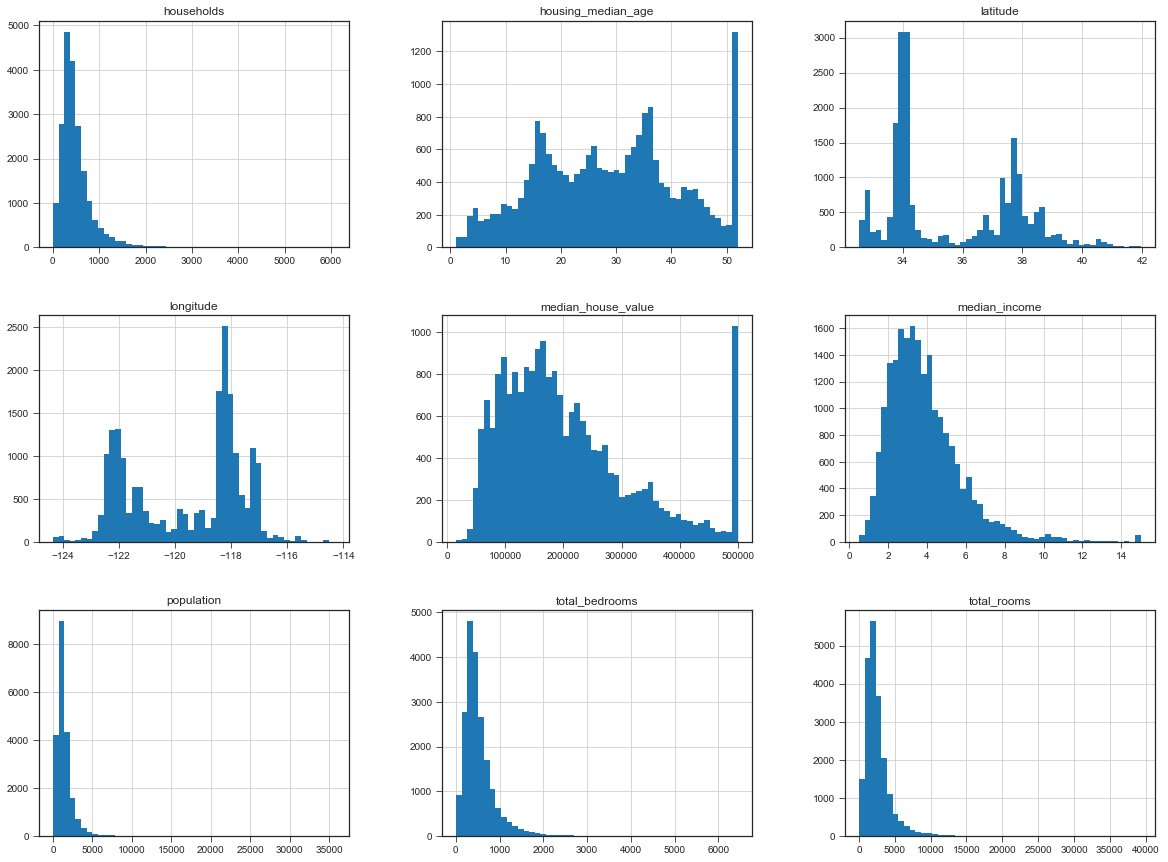

In [35]:
# Another quick way to get a feel of the type of data you are dealing with is to plot a
# histogram for each numerical attribute.
# only in a Jupyter notebook
%matplotlib inline  
import matplotlib.pyplot as plt
from matplotlib import style

# Use ggplot style for matplotlib (Fixes the hidden axes in JupyterLab Dark)
style.use('seaborn-whitegrid') 

# The hist() method relies on Matplotlib, which in turn relies on a
# user-specified graphical backend to draw on your screen. So before
# you can plot anything, you need to specify which backend Matplotlib
# should use. The simplest option is to use Jupyter’s magic command
# %matplotlib inline. This tells Jupyter to set up Matplotlib
# so it uses Jupyter’s own backend. Plots are then rendered within the
# notebook itself. Note that calling show() is optional in a Jupyter
# notebook, as Jupyter will automatically display plots when a cell is
# executed.

# You can either plot this one attribute at a time, or you can call the hist() method on the
# whole dataset, and it will plot a histogram for each numerical attribute
style.use('seaborn-ticks')
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
# Notes on the Histogram
# 1. The median income attribute does not look like it is expressed in US dollars (USD)
# 2. The housing median age and the median house value were also capped. The latter
# may be a serious problem since it is your target attribute (your labels). Your
# Machine Learning algorithms may learn that prices never go beyond that limit.
    # Potential solutions
    # a. Collect proper labels for the districts whose labels were capped.
    # b. Remove those districts from the training set (and also from the test set, since
    # your system should not be evaluated poorly if it predicts values beyond
    # $500,000).
# 3. These attributes have very different scales. We will discuss this later in this chapte 
# when we explore feature scaling.

# 4. Finally, many histograms are tail heavy: they extend much farther to the right of
# the median than to the left. This may make it a bit harder for some Machine
# Learning algorithms to detect patterns. We will try transforming these attributes
# later on to have more bell-shaped distributions.

In [37]:
# Creating a Test Set
# DataFrame.iloc
# Purely integer-location based indexing for selection by position.

def split_train_test(data, test_ratio):
    """Return a split of the original dataset into 2 sub-sets: train set and test set.
    A new set of train and test sets will be created each time this function is run,
    unless the seed is kept fixed."""
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [38]:
# Rafa Notes of split_train_test()

# Produce a random permutation of 10 elements (0 to 9)
np.random.permutation(3)

array([2, 0, 1])

In [39]:
# Basic slicing
l = list([20, 40, 4, 3.5, 15, 75.3])
print(l[:3])  # prints 3 elements: 0th, 1st, 2nd. "Up until, but don't include the 3rd one".
print(l[3:])  # prints all elements including the beginning of the interval
len(housing)
type(housing)

[20, 40, 4]
[3.5, 15, 75.3]


pandas.core.frame.DataFrame

In [40]:
# Assigning Train and Test
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [41]:
## Notes on Reproducibility
# Each time split_train_test() is called, a new test/train split is created
# Solutions:
    # 1. Save the split on the first run and load it in future sessions (Not robust for updated datasets)
    # 2. Set the seed for the RNG (Not robust for updated datasets)
    # 3. Hash identification

In [42]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    # This function gets called from split_train_test_by_id, where hash is defined by default\
    # Hashes a single ID, not a vector. Needs help from an auxiliary function like map or apply
    # [-1] is to keep only the last byte of the hash
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column_label, hash=hashlib.md5):
    # Info on MD5 hashing: https://en.wikipedia.org/wiki/MD5
    ids = data[id_column_label]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    # DataFrame.loc
    # Access a group of rows and columns by label(s) or a boolean array.
    # NOT IN (i.e. Train Set); IN (i.e. test set)
    return data.loc[~in_test_set], data.loc[in_test_set]

In [43]:
# Rafa Notes
# Numpy supports a much greater variety of numerical types than Python does. 
# Using it for np.int64()
# Hashlib:
# This module implements a common interface to many different 
# secure hash and message digest algorithms.

In [44]:
## Rafa Notes on Hashing
# The issue with hashing being more or less robust for production implementations
# is that if new rows get appended to the data set, it must be done at the end of the 
# existing dataset. And, no older row can ever get deleted. The reason for the latter
# is that if a row gets deleted, and a new chunk of data is added. It is guaranteed
# that a row from the new dataset will have a row index from the older data set. 
# Therefore there is the possibility that the assigned index belonged to a training example.
# In effect ending reproducibility.

# Solution:
# Use the most stable features to build a unique identifier.
# For example, a district’s latitude and longitude are guaranteed to remain stable for a long time.

In [45]:
# Add an column ID
# For DataFrame with multi-level index, return new DataFrame with labeling information 
# in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc. if any 
# are None. For a standard index, the index name will be used (if set), 
# otherwise a default ‘index’ or ‘level_0’ (if ‘index’ is already taken) will be used.

housing_with_id = housing.reset_index()  # adds an index column

# Python Equivalent of R's dim()
housing_with_id.shape[0]  # R nrow()
housing_with_id.shape[1]  # R ncol()

print("Column Count. Before: ", housing.shape[1], ". After: ", housing_with_id.shape[1] , sep = "")
# housing_with_id.head()

Column Count. Before: 10. After: 11


In [46]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [47]:
# Example. Hashing an individual ID and taking the last byte
# If less than (256*test_ratio) it would be a test example
hash = hashlib.md5
data = housing_with_id["id"][:3]
hash(data[0]).digest()[-1]

129

In [48]:
# Splitting Train/Test using Scikit Learn
# there is a random_state parameter that allows you to set the random
# generator seed as explained previously, and second you can pass it multiple datasets
# with an identical number of rows, and it will split them on the same indices (this is
# very useful, for example, if you have a separate DataFrame for labels):

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

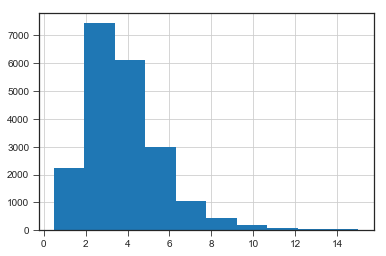

In [49]:
housing_with_id['median_income'].hist()

In [50]:
# Suppose that the median income is a very important attribute 
# (i.e. Reason why we are doing stratified simpling by this vaiable)
# to predict median housing prices. You may want to ensure that
# the test set is representative of the various categories of incomes in the whole dataset.

# The following code creates an income category
# attribute by dividing the median income by 1.5 (to limit the number of income categories),
# and rounding up using ceil (to have discrete categories), and then merging
# all the categories greater than 5 into category 5

# pd.DataFrame.where
# Return an object of same shape as self and whose corresponding entries
# are from self where cond is True and otherwise are from other.
### Using pd.DataFrame.where()
# Where cond True, KEEP. Ohterwise, use next arg
housing["income_cat"] = np.ceil(housing['median_income'] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# housing["median_income"].describe()

# Slicing Test
# _vars = ("median_income", "income_cat1", "income_cat")
# housing.loc[:, _vars].head()

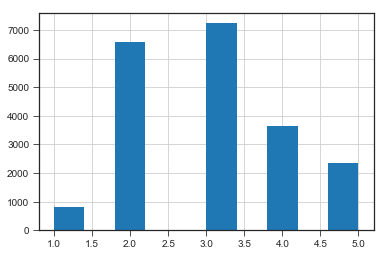

In [51]:
# Checking the newly created income categories
housing["income_cat"].hist()

In [52]:
15//1.5
housing["income_cat"][0:3] < 5

0    False
1    False
2    False
Name: income_cat, dtype: bool

In [53]:
# Stratified sampling based on the income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [54]:
# Establishing value proportions in the original dataset
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [55]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [56]:
# Notes on Stratified Sampling

# Dropping "income_cat" so the data is back to its original state
# NOTE: This variable was only introduced to created a representative 
# test set. The "income_cat" variable won't be used as a feature

for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [57]:
# Create a copy of the dataset to explore/edit safely
# Remember to explore and make changes on the training set without looking at the test set
housing = strat_train_set.copy()

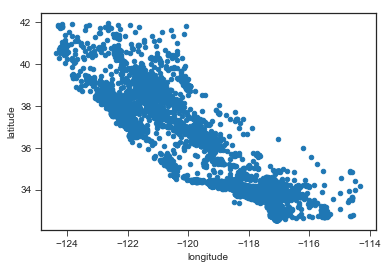

In [58]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

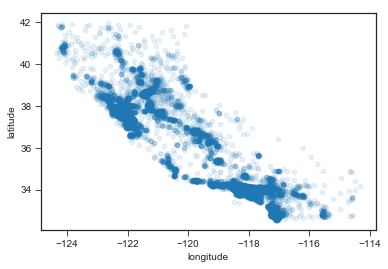

In [59]:
# Setting the alpha option to 0.1 makes it much easier to visualize the places
# where there is a high density of data points
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

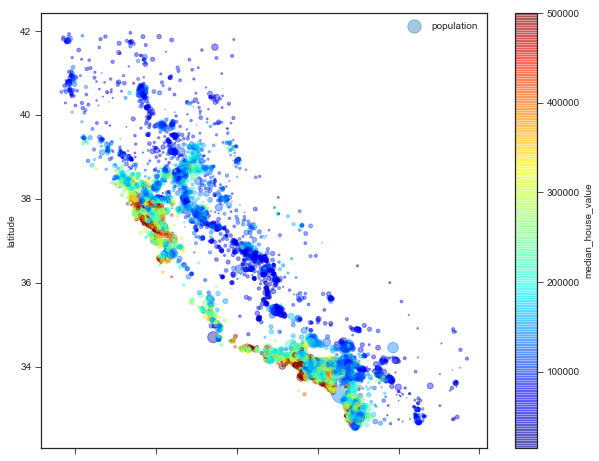

In [60]:
# The radius of each circle represents
# the district’s population (option s), and the color represents the price (option c). We
# will use a predefined color map (option cmap) called jet, which ranges from blue
# (low values) to red (high prices)

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
            s=housing['population']/100, label = "population", 
            c="median_house_value", cmap = plt.get_cmap("jet"), colorbar= True,
            figsize=(10,8))
plt.legend()

### Looking for Correlations

In [61]:
# Correlation Matrix (Uses Standard (Pearson's) Correlation Coefficient)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

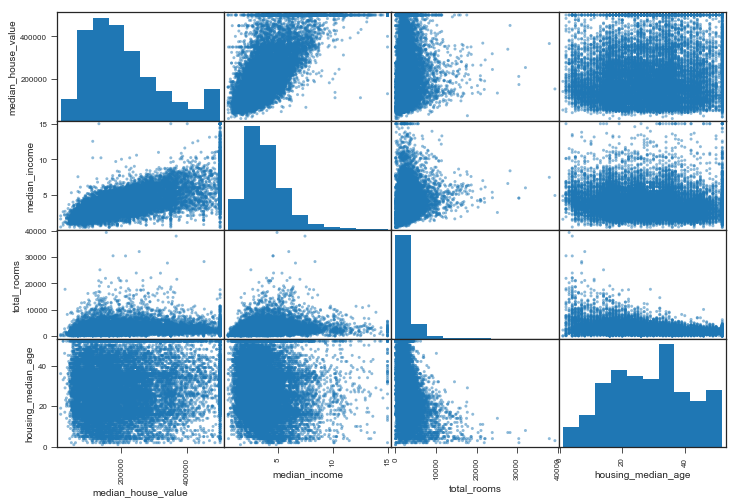

In [62]:
# Another Way to plot correlations
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_mat = scatter_matrix(housing[attributes], figsize=(12, 8))

# Notes:
# The diagonal is always corr=1 between the same variable. i.e. a straight line
# pandas does a histogram to provide more useful information

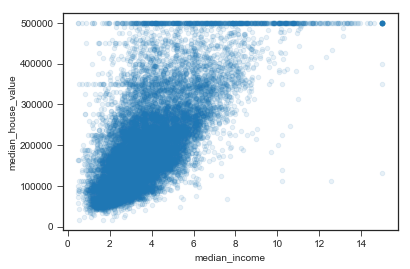

In [63]:
# The most promising attribute to predict the median house value is the median
# income, so let’s zoom in on their correlation scatterplot

housing.plot(kind='scatter',x='median_income' , y='median_house_value', alpha = 0.1)

## Experimenting with Attribute Combinations

In [64]:
# Feature Engineering

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [65]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

# bedrooms_per_room is more correlated than total_bedrooms or total_rooms
# rooms_per_household is more correlated than total_rooms or households

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms 

In [66]:
# drop creates a copy of the data and does not affect (in-place) strat_train_set
# this part is to separate the features from the labels (preprocessing differs for both)
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Dealing with Missing Features

In [67]:
# Most Machine Learning algorithms cannot work with missing features. 
 # Three options:
    # • Get rid of the corresponding districts. (row deletion)
    # • Get rid of the whole attribute. (column deletion)
    # • Set the values to some value (zero, the mean, the median, etc.) (value imputation)
    
# Note that if you set the missing values to some value (option 3)
# you should save the replacing value to be used in: 1) test set; 2) once the system goes live 
    
housing.describe()
# notice how total_bedrooms has a smaller value count than the other variables
# 16354 vs 16512

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


### Scikit Learn's Imputer

In [68]:
# Using Scikit Learn's Imputer
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# Median can only be computed on numerical variables. Dropping non-numerical variables:
    # pd.DataFrame.drop creates a copy while leaving out X
housing_num = housing.drop("ocean_proximity", axis=1)

# Compute Calculations and store in .statistics_
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [69]:
imputer.statistics_ == housing_num.median().values
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [70]:
# Assign the imputation values
X = imputer.transform(housing_num)  # results in a plain Numpy Array
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [71]:
# Equivalent to R's names() function
housing_num.columns[:]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

### Handling Text and Categorical Attributes

In [72]:
### Converting Text labels to numbers
# Scikit-Learn provides a transformer called Label Encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
# The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter
# The transformation is performed by the transform() method with the dataset to
# transform as a parameter.
# All transformers also have a convenience method called fit_transform()
# that is equivalent to calling fit() and then transform() (but sometimes
# fit_transform() is optimized and runs much faster).
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [73]:
# One issue with this representation is that ML algorithms will assume that two nearby
# values are more similar than two distant values. Obviously this is not the case (for
# example, categories 0 and 4 are more similar than categories 0 and 1). To fix this
# issue, a common solution is to create one binary attribute per category: one attribute
# equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute
# equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is
# called one-hot encoding, because only one attribute will be equal to 1 (hot), while the
# others will be 0 (cold).
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [74]:
# Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values
# into one-hot vectors. Let’s encode the categories as one-hot vectors.

# Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, 
# so we need to reshape itb

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [75]:
# Showing the input required by OneHotEncoder.fit_transform() (a 2D array)
housing_cat_encoded.reshape(-1,1)

array([[0],
       [0],
       [4],
       ..., 
       [1],
       [0],
       [3]], dtype=int64)

In [76]:
# Note on sparse matrices:
# Notice how housing_cat_1hot is a SciPy sparse matrix. 
# i.e. it only stores the location of the nonzero element (always 1 in OneHotEncoding)
# To convert back to a regular matrix, use NumPy's toarray() method:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [77]:
# We can apply both transformations (from text categories to integer categories, then
# from integer categories to one-hot vectors) in one shot using the LabelBinarizer class:

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

# Note that this returns a dense NumPy array by default. You can get a sparse matrix
# instead by passing sparse_output=True to the LabelBinarizer constructor.

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Creating Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities
(such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance),
all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid \*args and \**kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for automatic
hyperparameter tuning. For example, here is a small transformer class that adds
the combined attributes we discussed earlier:

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

# Position Indices corresponding to the column location within Dataframe
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # Concatenate X with the newly created attributes
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # Concatenate X with the newly created attributes
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
# Testing that add_bedrooms_per_room is set to False
# attr_adder.add_bedrooms_per_room

In [79]:
housing.columns[3:7]

Index(['total_rooms', 'total_bedrooms', 'population', 'households'], dtype='object')

### Feature Scaling

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales.
This is the case for the housing
data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.

There are two common ways to get all attributes to have the same scale:  
* Min-Max
* Scaling and Standardization

Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting
the min value and dividing by the max minus the min. **Scikit-Learn** provides a
transformer called **MinMaxScaler** for this. It has a *feature_range* hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.

Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the variance so that the resulting
distribution has unit variance. Unlike min-max scaling, standardization does not
bound values to a specific range, which may be a problem for some algorithms (e.g.,
neural networks often expect an input value ranging from 0 to 1). However, **standardization
is much less affected by outliers**. For example, suppose a district had a median
income equal to 100 (by mistake). Min-max scaling would then crush all the other
values from 0–15 down to 0–0.15, whereas standardization would not be much affected.
Scikit-Learn provides a transformer called **StandardScaler** for standardization.

**Rafa Note:** As with all the transformations, it is important to fit the scalers to
the training data only, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).

### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

# The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
# steps. All but the last estimator must be transformers (i.e., they must have a
# fit_transform() method). The names can be anything you like.

num_pipeline = Pipeline([
    ("imputer", Imputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

# housing_num is the training part of the housing dataset with only numerical features selected
housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like.

**Rafa Note:** They must have a fit_transform() function because transform() operations are the ones that effect (in place) changes to the data at any given stage in the pipeline to leave it ready as input for the next stage. 

You now have a pipeline for numerical values, and you also need to apply the LabelBi narizer on the categorical values: how can you join these transformations into a single pipeline? Scikit-Learn provides a **FeatureUnion** class for this.

In [81]:
# There is nothing in Scikit-Learn to handle Pandas DataFrames,
# so we need to write a simple custom transformer for this task:

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [82]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [83]:
## A full pipeline handling both numerical and categorical attributes
from sklearn.pipeline import FeatureUnion

# Vectors holding the labels of the appropriate variables
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Pipeline for Numerical Variables
num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

# Pipeline for Categorical Variables
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', MyLabelBinarizer()),
])

# Full Pipeline: Joining together both the Numerical and Categorical Pipelines
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [84]:
# Running the complete pipeline
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [85]:
housing_prepared.shape

(16512, 16)

**Note on LabelBinarizer:**

From StackOverflow:
https://stackoverflow.com/questions/46162855/fit-transform-takes-2-positional-arguments-but-3-were-given-with-labelbinarize

"LabelBinarizer is not supposed to be used with X (Features), but is intended for labels only. Hence the fit and fit_transform methods are changed to include only single object y. But the Pipeline (which works on features) will try sending both X and y to it. Hence the error."

# Select and Train a Model

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# X, y
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [87]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

MSE = 68628.19 Not a great score: most districts’ median_housing_values range between \$120,000 and $265,000.  
The model is **UNDERFITTING** the data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough.  

**Fixing An Underfitting Model:**
- Select a more powerful model
- Feed the training algorithm with better features
- Reduce the contraints on the model (Does not apply, no regularization being used)

In [88]:
## Training a Decision Tree Regressor 

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
# Evaluating the model on the training set
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the validation
set. It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
performs K-fold cross-validation: it randomly splits the training set into 10 distinct
subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
picking a different fold for evaluation every time and training on the other 9 folds.
The result is an array containing the 10 evaluation scores:

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(rmse_scores)

Scores: [ 69316.02634772  65498.84994772  71404.25935862  69098.46240168
  70580.30735263  75540.88413124  69717.93143674  70428.42648461
  75888.17618283  68976.12268448]
Mean: 70644.9446328
Standard deviation: 2938.93789263


In [91]:
# Same scores for the Linear Regression Model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


Let’s try one last model now: the **RandomForestRegressor**. As we will see in Chapter
7, Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning, and it is often a great way to push ML algorithms
even further.

In [92]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
# fit runs the actual training of the model
forest_reg.fit(housing_prepared, housing_labels)

## cross_val_score is extremely powerful. It train and evaluates in the same call
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 52869.23106834  49189.93801195  51726.73647871  54995.98190463
  50979.93079904  55978.43765914  52283.7609046   51001.92227546
  54447.35786983  53389.94422283]
Mean: 52686.3241195
Standard deviation: 1971.26547795


In [93]:
# Evaluating the model on the training set
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22252.738943108321

The model is still overfitting the training set. Possible solutions for **Overfitting** are:
- To simplify the model (i.e. regularize it)
- Get a lot more training data (to "spread the error away" via adding a lot of "variability"?)


At this stage the goal is to shortlist 2 to 5 promising models

In [94]:
from sklearn.externals import joblib
# joblib.dump(forest_reg, "my_model.pkl")

In [ ]:
# and later...
# my_model_loaded = joblib.load("my_model.pkl")

### Fine Tune your Model

Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

# List of dictionaries
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

In [ ]:
print("Best Parameters\n {}".format(grid_search.best_params_))
print("\n")
print("Best Estimator\n {}".format(grid_search.best_estimator_))

If *GridSearchCV* is initialized with *refit=True* (which is the
default), then once it finds the best estimator using crossvalidation,
it retrains it on the whole training set. This is usually a
good idea since feeding it more data will likely improve its performance.

**Rafa Note:** "Best Estimator" refers to the complete set of parameters that define the model. 

In [ ]:
# Evaluation scores also avalaible

cvres = grid_search.cv_results_
cvres.keys()
np.sqrt(-cvres["mean_test_score"])

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Don’t forget that you can treat some of the data preparation steps as
hyperparameters. For example, the grid search will automatically
find out whether or not to add a feature you were not sure about
(e.g., using the **add_bedrooms_per_room hyperparameter** of your
CombinedAttributesAdder transformer). It may similarly be used
to automatically find the best way to handle outliers, missing features,
feature selection, and more.

### Randomized Search

The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter *search space* is large, it is
often preferable to use ***RandomizedSearchCV*** instead. This class can be used in much
the same way as the ***GridSearchCV*** class, but instead of trying out all possible combinations,
it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main benefits:  

• If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few values
per hyperparameter with the grid search approach).  
• You have more control over the computing budget you want to allocate to hyperparameter
search, simply by setting the number of iterations.

### Analyze the Best Models and their Errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
# encoder.classes_ retrieves the class breakdown
# Remember that they were hot encoded before
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

In [ ]:
list(encoder.classes_)

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)

Looks like only one *ocean_proximity* category is useful. The rest can be dropped.
**Rafa Note:** What are importance scores, how to interpret, and what actions can be derived from them?

### Evaluate Your System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Call transform(), not fit_transform()!
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47800.36
final_rmse

The performance will usually be slightly worse than what you measured using crossvalidation
if you did a lot of hyperparameter tuning (because your system ends up
fine-tuned to perform well on the validation data, and will likely not perform as well
on unknown datasets). It is not the case in this example, but when this happens you
must resist the temptation to tweak the hyperparameters to make the numbers look
good on the test set; the improvements would be unlikely to generalize to new data.